# Supervised Learning Final Project - Rajdeep Mallick
Github Repo Link: https://github.com/RajdeepMallick21/Supervised_Learning_Final_Project_RajdeepMallick.git

## Project Topic
This project will be about finding out whether the physiochemical components can be used to determine the wine preference of humans. The wine preference will be ranked from 0 to 9. The project will also help discover which ML models with which hyperparameter values are appropriate to predict on this dataset. The results from this project could be used by wine sellers and customers to pick wines that have these particular properties if the accuracy or other metrics are high enough.
This project will use KNN and Decision Trees models to perfom Multi-class Classification tasks and predict the ranking of a particular wine based on its properties.

## About the Data
This Wine Quality Dataset was downloaded from Kaggle at the following link:
https://www.kaggle.com/datasets/rajyellow46/wine-quality

The dataset contains the physiochemical properties of various wines along with the output ranking by humans.

The description provided by the uploader is as follows:

"The dataset was downloaded from the UCI Machine Learning Repository.
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).
These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Two datasets were combined and few values were randomly removed."

The dataset is in the tabulated form and was downloaded as a CSV file. The file size was 390.38KB. 
1. There are 13 columns to this dataset. 
2. The 12 columns used for features are type, fixed acidity, volatile acidity, citric acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.
3. The 1 column for target variable is called quality and it is the ranking of the wine.


## APA style citation for Dataset:

Parmar, R. (2024, March). Wine Quality, Version 1. Retrieved March 4, 2025 from https://www.kaggle.com/datasets/rajyellow46/wine-quality.

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016 

There is no copyright on this dataset (as can be checked from the link above). It is in the public domain and is free to be copied, modified and distributed without requiring permission.

In [1]:
# Importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier


In [2]:
#Importing data from csv into a pandas dataframe
df = pd.read_csv('Data/winequalityN.csv')

# Checking first 5 rows to see if data has imported succesfully
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## More about the data
The data types can be seen in the table below.
1. Most of the columns have an appropriate data type of float64 or int64.
2. type column has an inappropriate data type of string object and will have to be converted in the Data Cleaning Section

It can also be seen that there are 6497 rows and 13 columns in the dataframe

The description of Feature names are as follows:

1. type = wine type (red or white)
2. fixed acidity = sum of the wine's natural acids amount (grams/Liter)
3. volatility acidity = sum of gaseous acids amount (grams/Liter)
4. citric acid = amount of citric acid (grams/Liter)
5. residual sugar = amount of residual sugar (grams/Liter)
6. chlorides = amount of chlorides (grams/deciLiter)
7. free sulfur dioxide = amount of free sulfur dioxide (milligrams/Liter)
8. total sulfur dioxide = amount of total sulfur dioxide (milligrams/Liter)
9. density = density of wine (grams/milliLiter)
10. pH = pH level of wine 
11. sulphates = amount of sulphates (milligrams/L)
12. alcohol = alcohol content in wine (percent value %)
13. quality = quality/ranking score (between 0 and 10)

In [3]:
# Checking data types of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Data Cleaning and EDA
Upon visual inspection of the csv file, it was found that some cells had missing values.

This was further confirmed by calling the .isnull().sum() methods of our dataframe and can be seen below.
The output of df.info() above also showed that there are a few Non-Null values in these exact columns when Non-Null Count value was compared to the total number of rows.

In [4]:
# Calculating the number of missing values from each column
num_of_missing_values = df.isnull().sum()
print(num_of_missing_values)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


The rows with missing values will have to be dropped from our dataframe using dropna() method of the dataframe object. It can now be seen below that there are only 6463 rows left in our dataframe compared to the 6497 before dropping missing values according to the shape attribute.

In [5]:
# Dropping dataframe rows that have missing values
df = df.dropna()

# Printing shape of the new dataframe
print(df.shape)

(6463, 13)


There 'type' column had an incorrect data type. It has the string object data type which has to be converted to a numeric value like int64. This feature is a binary non-ordinal categorical variable. It should be converted to binary values of 0 and 1.

The following changes are performed below:

1. The get_dummies() method was used to convert the categorical variable 'type' into indicator variables 'white' and 'red' with binary numerical values 1 and 0.
2. The data type of these columns were changed to int64 in the same method.
3. The original 'type' column was dropped since it was no longer needed.

There are 13 features columns and none have values missing. Therefore, all of the features were kept to be used by our model later.

In [6]:
# Splitting type column into two columns for white and red
# Converting types of the two new columns from Boolean to int64
df_type = pd.get_dummies(df["type"], dtype='int64')
df = pd.concat((df_type, df), axis=1)
df = df.drop(columns='type')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   red                   6463 non-null   int64  
 1   white                 6463 non-null   int64  
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 757.4 KB


,red,white,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


A correlation matrix was produced below. It can be seen that there are no standout features that are highly correlated to our target 'quality' variable since none of the absolute values are above 0.7. 

The 'alcohol' feature seems to be the best predictors for the target variable since it has the highest value of 0.44. An increase in this value can increase the ranking of the wine. The features 'density', 'volatile acidity' and 'chlorides' show a decent amount of negative correlation to our target variable. They had values of -0.27, -0.20 and -0.3 respectively. This means that a negative change in their values could potentially increase the ranking/quality of the wine. 

To check whether any of these features above are linearly dependent on one another, the correlation values between them was inspected. The results of correlation are as follows:

1. 0.38 volatile_acidity to chloride 
2. 0.27 volatile_acidity to density
3. -0.04 volatile_acidity to alcohol
4. 0.36 chloride to density
5. -0.26 chloride to alcohol
6. -0.69 density to alcohol

It can be seen that the features 'density' and 'alcohol' have a strong correlation to each other that is very close to 0.7. This could indicate that they are linearly dependent and have redundant info.


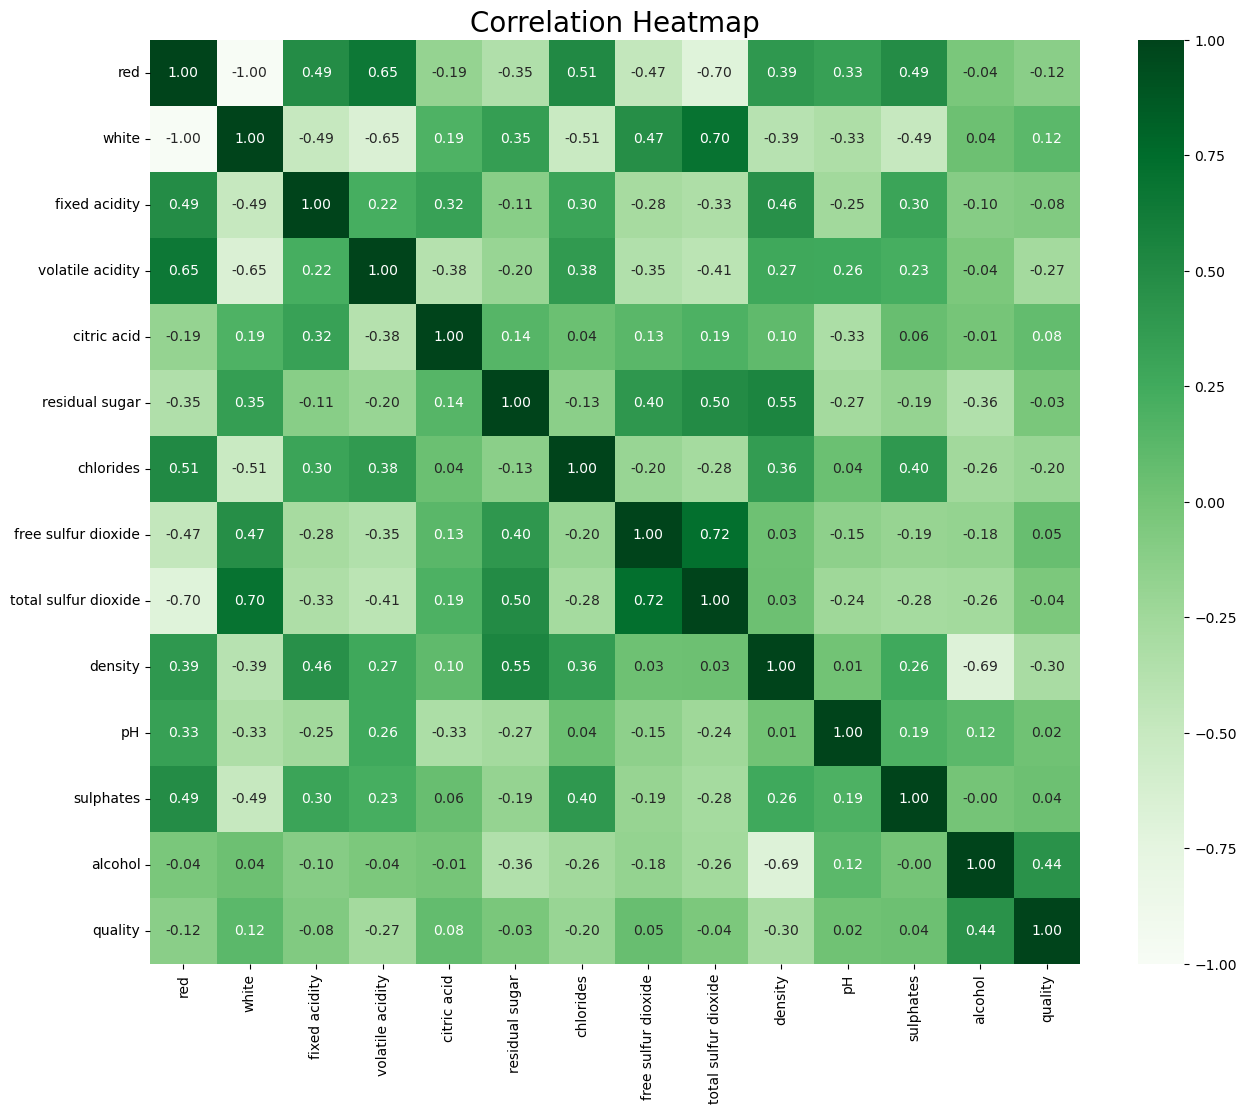

In [7]:
# Plotting the correlation matrix heatmap to check for correlated values to quality column
plt.figure(figsize=(15,12))
corr_hmap = sns.heatmap(df.corr(), cmap="Greens", vmin=-1, vmax=1, annot=True, fmt = '.2f')
corr_hmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20})
plt.show()

A pairplot can be used to further check if some features are linearly dependent or collinear. The pairplot will show the distribution of the feature itself in the diagonal plots from top left to bottom right as a histogram. It will also show the distribution of one feature over another in scatterplots in the off diagonal elements.

We can further examine whether the 'density' and 'alcohol' features are linearly dependent or collinear in their scatterplot. It can be seen that there is no thin line for the distribution of these two features over one another. Therefore, we can conclude that there is no collinearity between these two features. Although, if these two features are multicollinear then they wont be detected from the correlation matrix or the pairplot below. In this case, it would need further analysis by checking the VIF values for each feature.

Therefore, none of the features have to be dropped from our dataframe.

<Figure size 640x480 with 0 Axes>

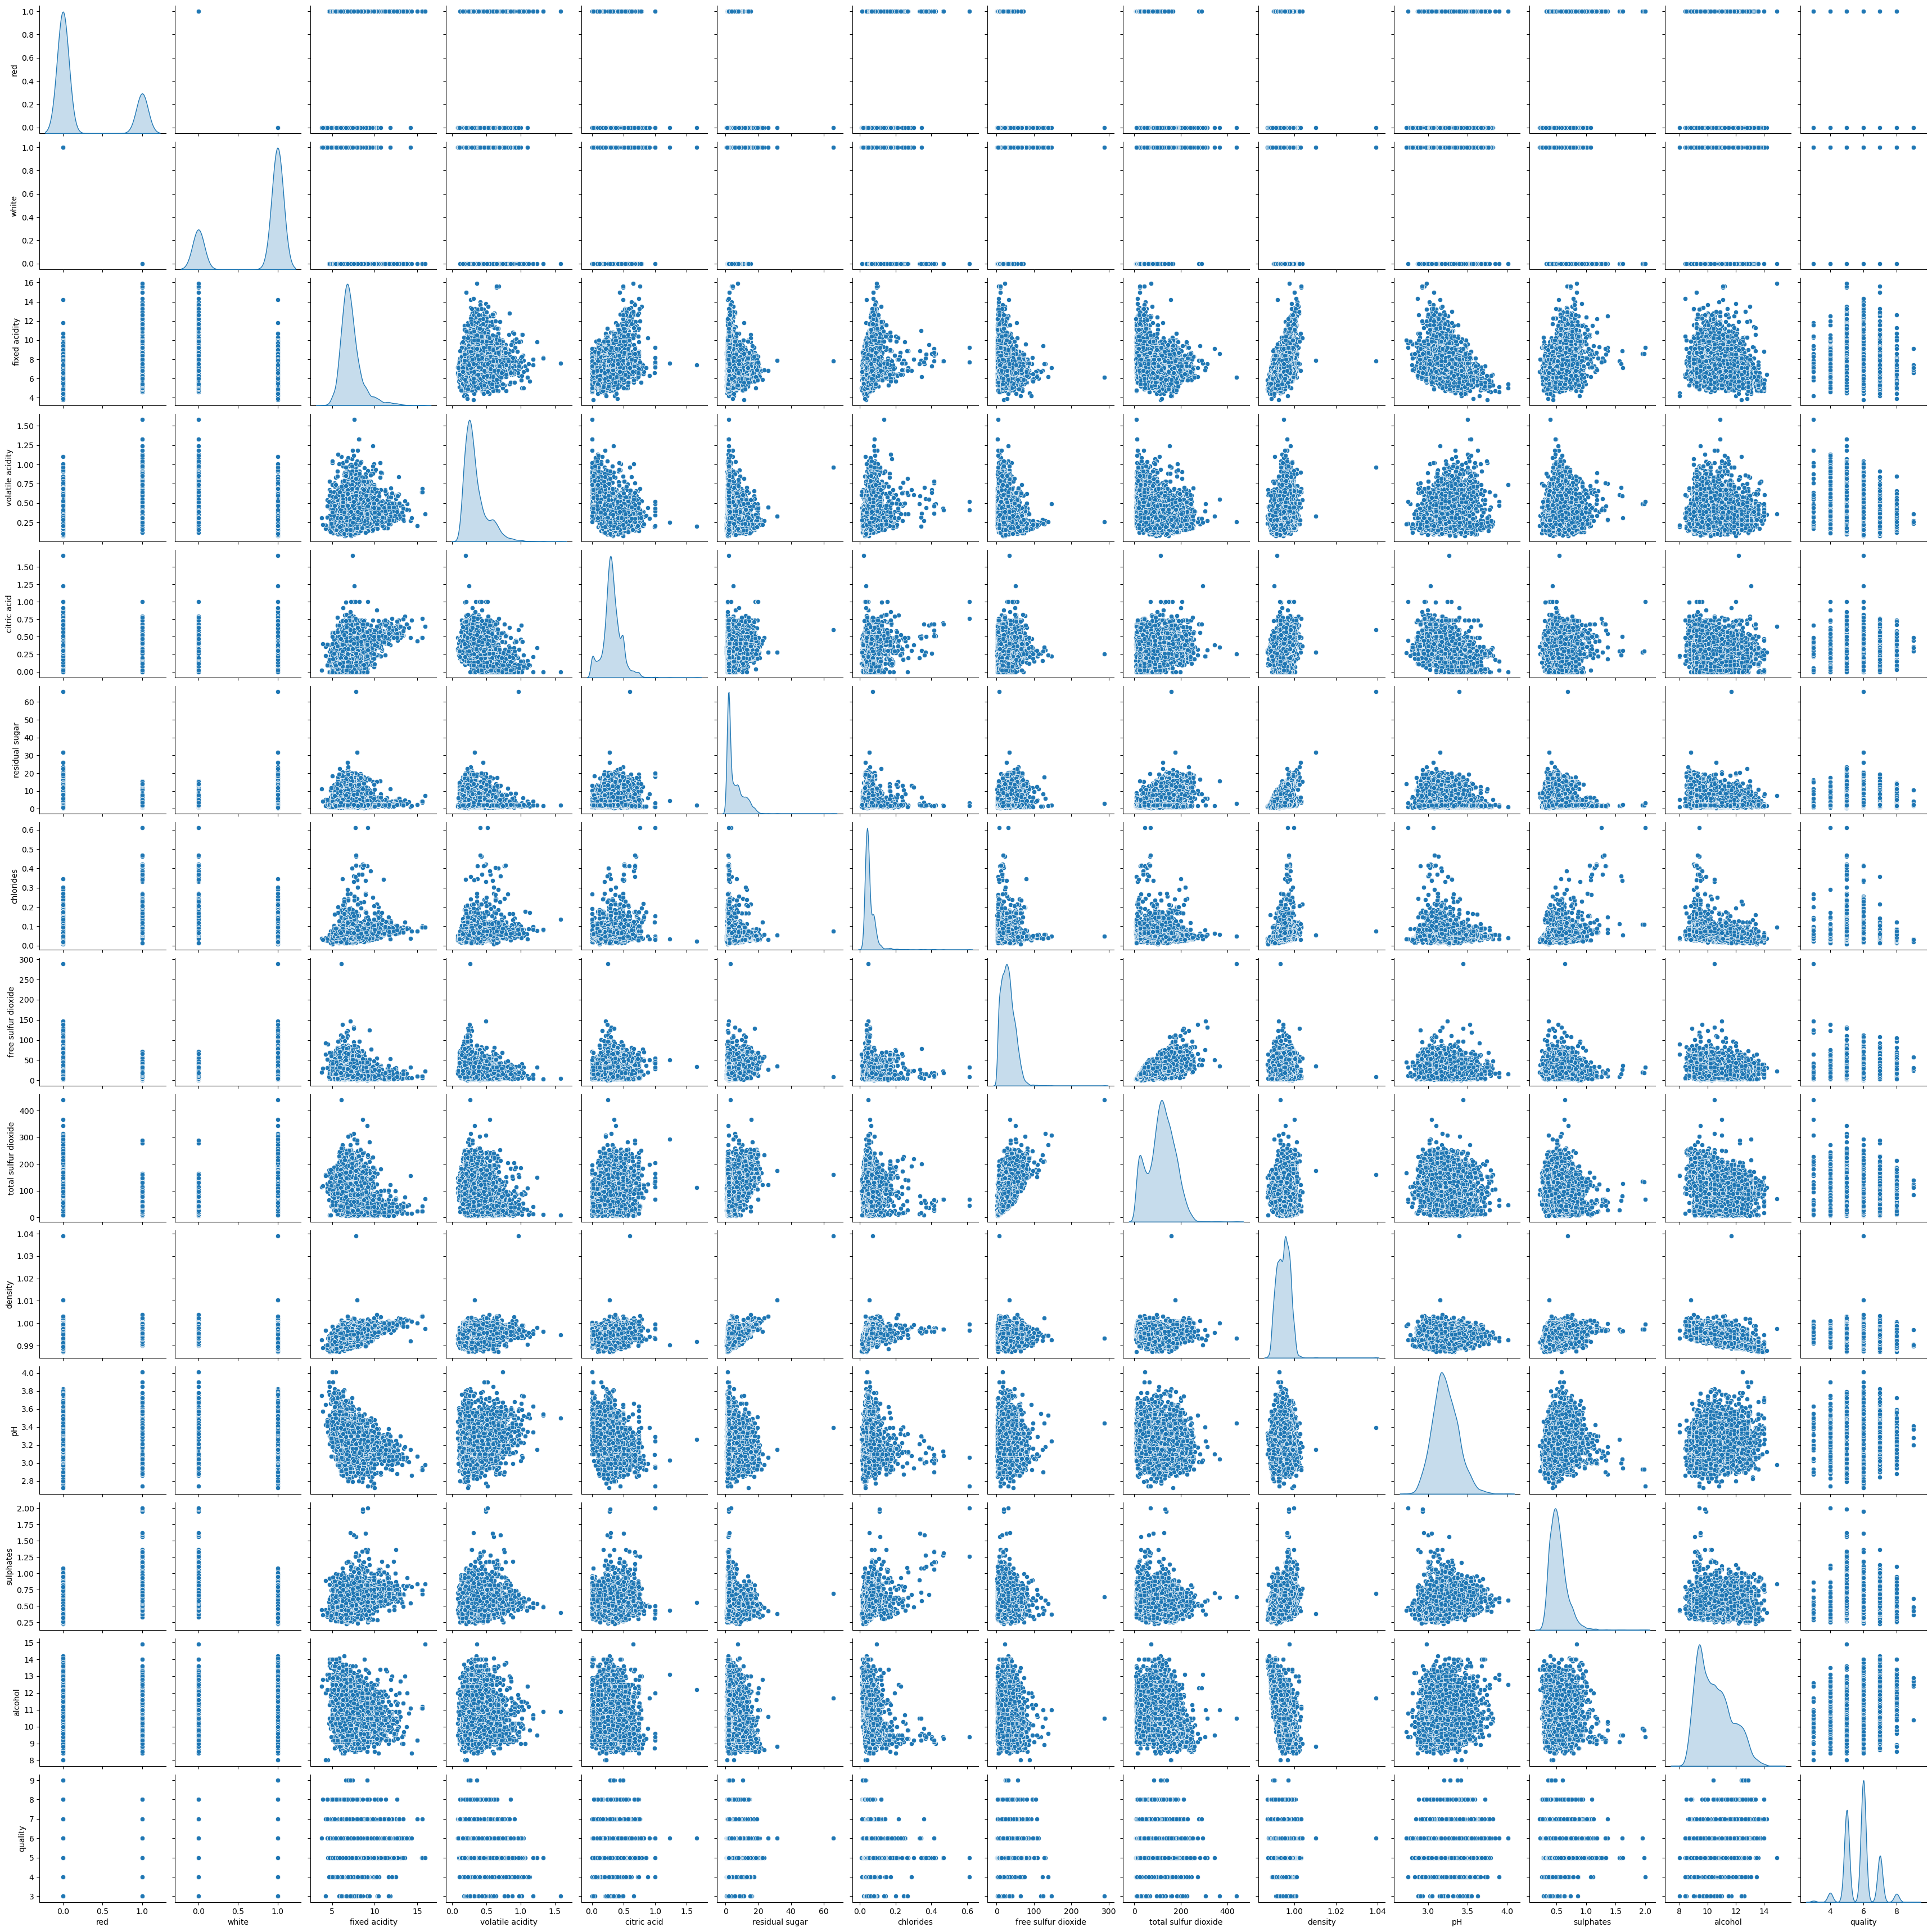

In [8]:
## Plotting the pairplot to check for collinearity
plt.figure()
sns.pairplot(df, diag_kind='kde')
plt.show()

A VIF dataframe was created below to show the vif values of each feature in our dataset. This involves fitting a feature x with all the other features to see if they can predict the value of the feature x. Very high values of vif will indicate multicollinearity between features.

As can be seen, the vif values aren't 'inf' or very high which would mean that there is no multicollinearity. There are also no values in the correlation matrix above 0.7. These two results combined would suggest that none of our features have to be removed from the dataset.

In [9]:
# Creating vif_df dataframe with just the names of the feature columns
vif_df = pd.DataFrame()
vif_df['features'] = df.columns[:len(df.columns)-1]

# Producing vif values for these feature columns
vif_df['VIF_value'] = [vif(df.values, i) for i in range(len(df.columns) - 1)]
print(vif_df)

                features     VIF_value
0                    red  5.993218e+05
1                  white  1.824207e+06
2          fixed acidity  5.082700e+00
3       volatile acidity  2.287008e+00
4            citric acid  1.621795e+00
5         residual sugar  9.790884e+00
6              chlorides  1.660492e+00
7    free sulfur dioxide  2.252867e+00
8   total sulfur dioxide  4.058575e+00
9                density  2.251996e+01
10                    pH  2.572168e+00
11             sulphates  1.576768e+00
12               alcohol  5.752019e+00


# Models

The features and target variables are put into separate dataframes below. The test and train data splits are also created. The test data sets get 25% of rows from the original dataframe df.

In [10]:
# Creating separate dataframes for features and target variable
Y = df['quality'].values
X = df.drop('quality', axis=1).values

# Creating training and validation datasets using train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=0)

# Printing the shape of each dataframe to check the size
print('train_x shape: ', train_x.shape)
print('train_y shape: ', train_y.shape)
print('test_x shape: ', test_x.shape)
print('test_y shape: ', test_y.shape)

train_x shape:  (4847, 13)
train_y shape:  (4847,)
test_x shape:  (1616, 13)
test_y shape:  (1616,)


## KNN Model

Since our dataset only has 13 features, we can use the KNN classifer as it wont suffer from the curse of dimensionality. This is beacuse there are an adequate amount of samples for the number of features/dimensions. This should keep the accuracy of the predictions high for this model.  

In the KNN model we can train the model with our training datasets using BallTree. There will be three methods to the KNN class: majority, classify and predict. The predict function will receive the dataset wiht feature values and will predict target values for each row. The predict function does this by calling the classify function. The classify function queries the BallTree object (that was trained earlier) to produce the distances and indices of the closest k values for a particular row of feature values. The classify function then calls the majority function to produce a majority vote from all the nearest k values to determine a predicted y target value.


In [11]:
class KNN:

    def __init__(self, x_train, y_train, K=5):
        """
        Creates a kNN instance

        :param x_train: numpy array with shape (n_rows,1)- e.g. [[1,2],[3,4]]
        :param y_train: numpy array with shape (n_rows,)- e.g. [1,-1]
        :param K: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        from sklearn.neighbors import BallTree
        self.balltree = BallTree(x_train)
        
        # Cache training labels and parameter K 
        self.y_train = y_train
        self.K = K 
        
    def majority(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """

        # Gets the true y values for the closest neighbors into c_vals_list by using
        # the closest neighbor indices on the y_train dataset
        c_vals_list = []
        for i in range(len(neighbor_indices[0])):
#             print(self.y_train[neighbor_indices[0][i]])
            c_vals_list.append(self.y_train[neighbor_indices[0][i]])
        
#         print(f'c_vals_list = ', c_vals_list)

        # Compares the true values of the closest neighbors in c_vals_list to find the majority value
        # The majority value will be returned as the predicted label
        # If there is a tie, then the k value will be reduced by 1.
        # This can be achieved by removing the furthest(last) neighbor value from the c_vals_list
        majority_value = None
        while majority_value is None:
            for i in range(len(c_vals_list)):
                count = 0

                for j in range(len(c_vals_list)):
                    if c_vals_list[i] == c_vals_list[j]:
                        count += 1

                if count > len(c_vals_list) // 2:
                    majority_value = c_vals_list[i]
#                     print(f'majority value is {majority_value} when k is {self.K}')
                    return majority_value
            c_vals_list.pop() 
        
    def classify(self, x):
        """
        Given a query point, return the predicted label 
        
        :param x: a query point stored as an ndarray  
        """        
        # set up shape of array to be 1 row with many columns
        x = x.reshape(1, -1)
        
        #calls self.balltree.query() to find k nearest neighbors
        returned_tuple = self.balltree.query(x, k=self.K)
        
#         print(f'For K = {self.K}, nd is {returned_tuple[0]}')
#         print(f'For K = {self.K}, ni is {returned_tuple[1]}')

        #nd holds values for distances to k nearest neighbors
        nd = returned_tuple[0]
        #ni holds values for indices of k nearest neighbors
        ni = returned_tuple[1]
        
        #calls majority to find the majority label
        majority_label = self.majority(neighbor_indices = ni, neighbor_distances = nd)
        
        return majority_label
        
        
    def predict(self, X):
        """
        Given an ndarray of query points, return yhat, an ndarray of predictions 

        :param X: an (m x p) dimension ndarray of points to predict labels for 
        """
        # your code here
        
        #calls classify to get a predicted label value
        # gathers all predicted labels in array yhat for each value in X
        yhat = np.empty([X.shape[0],])
#         print(X.shape)
        for i in range(X.shape[0]):
            yhat[i] = self.classify(X[i])
            
        
        return yhat
        
        

## Results and Analysis for KNN
Objects of KNN class will be trained with the training data sets created earlier. These objects/models will be used to predict values for both the test and train datasets at varying number of nearest k neighbors. 

The accuracy values will be determined for predictions on both train and test datasets for values of k ranging from 1 to 10.

From the accuracy values we can see that, the highest accuracy was found to be at 1 and 2 closest neighbors for both the predictions on training and testing data sets. The highest accuracy value for train dataset was 1.0 at k=1 and k=2. The highest accuracy value for test dataset was 0.56 at both k=1 and k=2.

Precision and Recall metrics have a trade-off in most cases. Since F1 score is a more robust metric which shows Precision and Recall at the same time, we will be plotting the F1 scores from every model below.

From the f1 score values it can be seen that it produces very similar results to the accuracy curves where k=1 and k=2 produce the best results for both training and testing datasets. The parameter for average in the f1_score function was set to 'weighted' for this metric to be calculated by taking label imbalance into account. 


acc_test_vals
[0.5612623762376238, 0.5612623762376238, 0.5037128712871287, 0.5037128712871287, 0.49133663366336633, 0.49133663366336633, 0.47957920792079206, 0.47957920792079206, 0.4839108910891089, 0.4839108910891089]
acc_train_vals
[1.0, 1.0, 0.8042087889416134, 0.8042087889416134, 0.7243655869610068, 0.7243655869610068, 0.6833092634619352, 0.6833092634619352, 0.6647410769548174, 0.6647410769548174]


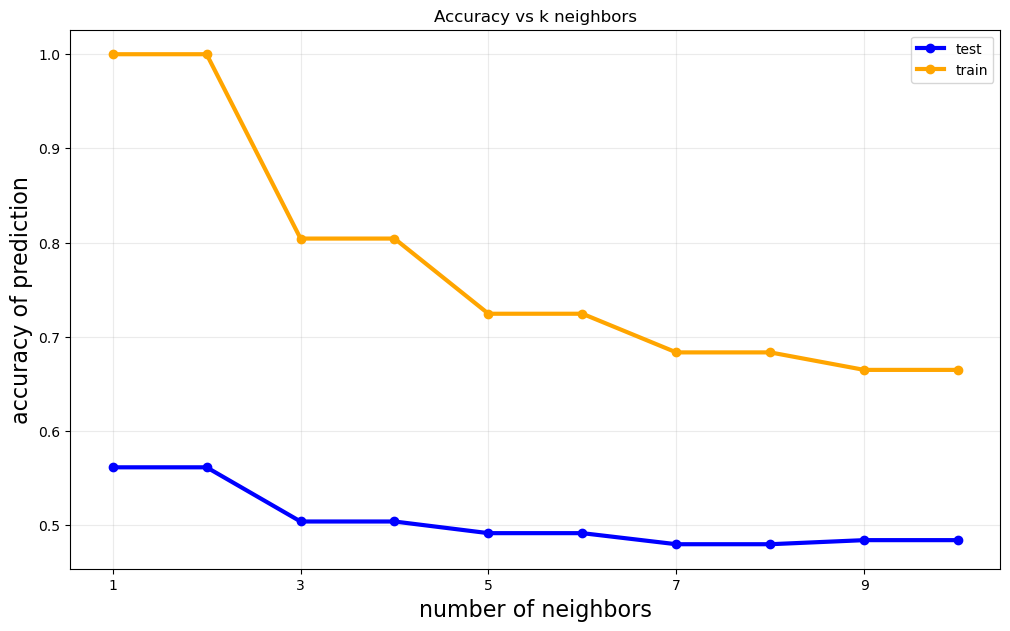

In [12]:
# Creates lists to hold calculated accuracy values for knn models with different k values
# The accuracy and f1 score values for models trained on test data and train data are separated
# allks holds all of the k values that will be used with the KNN classifer to produce prediction values for test and train data
acc_test_vals = []
acc_train_vals = []
f1_test_vals = []
f1_train_vals =[]
auc_test_vals=[]
auc_train_vals=[]

allks = range(1,11)

# Predicts y value then calculates accuracy to true y value for each k value in allks
for knn_val in allks:
    # trains model using training datasets and chosen k value from allks
    knn = KNN(train_x, train_y, K=knn_val)

    # predicts y values for test dataset
    val_yhat=knn.predict(test_x)
    # calculates accuracy score compared to test dataset
    acc_test_vals.append(accuracy_score(test_y, val_yhat))
    # calculates f1 score compared to test dataset
    f1_test_vals.append(f1_score(test_y, val_yhat, average='weighted'))


    # predicts y values for train dataset
    val_yhat=knn.predict(train_x)
    # calculates accuracy score compared to train dataset
    acc_train_vals.append(accuracy_score(train_y, val_yhat))
    #calculate f1 score compared to train dataset
    f1_train_vals.append(f1_score(train_y, val_yhat, average='weighted'))
    
print('acc_test_vals')
print(acc_test_vals)
print('acc_train_vals')
print(acc_train_vals)
    
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, acc_test_vals, marker="o", color="blue", lw=3, label="test")
ax.plot(allks, acc_train_vals, marker="o", color="orange", lw=3, label="train")
ax.set_xlabel("number of neighbors", fontsize=16)
ax.set_ylabel("accuracy of prediction", fontsize=16)
plt.xticks(range(1,11,2))
ax.grid(alpha=0.25)
ax.legend()
plt.title('Accuracy vs k neighbors')
plt.show()


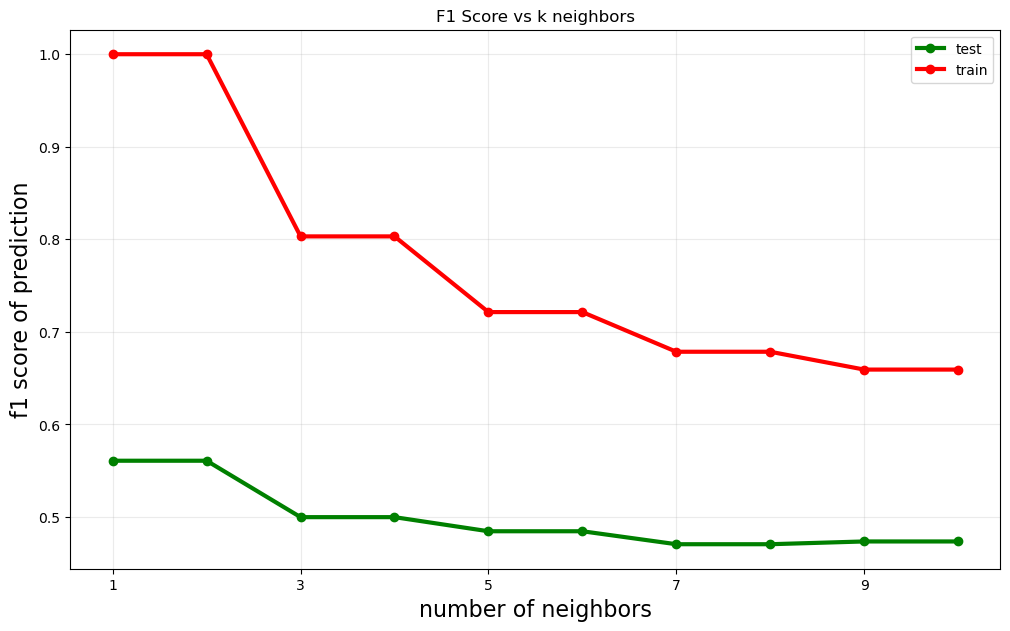

In [13]:
# This code was put here to plot the f1 score vs k neighbors separately

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
ax.plot(allks, f1_test_vals, marker="o", color="green", lw=3, label="test")
ax.plot(allks, f1_train_vals, marker="o", color="red", lw=3, label="train")
ax.set_xlabel("number of neighbors", fontsize=16)
ax.set_ylabel("f1 score of prediction", fontsize=16)
plt.xticks(range(1,11,2))
ax.grid(alpha=0.25)
ax.legend()
plt.title('F1 Score vs k neighbors')
plt.show()


## Discussion and Conclusion for KNN Model

Both the f1 score and the accuracy score curves of our KNN models produced similar results for k values ranging from 1 to 10. The highest f1 and accuracy score for our validation dataset was 0.56 at k=2. This is not a very high value and shows that the KNN model may need further tweaks or a different model may have to be used for this classification task. In the description of the dataset it was mentioned that the labels were very imbalanced. This can be viewed in the confusion matrix for the k=1 KNN model below as the diagonal from top left to bottom right doesnt have too many values in every slot. This means that there are very low values for certain labels espeically at the extremities. There are also no values for certain labels which is why the confusion matrix is not the right size. It is a 7x7 matrix when it should be a 10x10 matrix for quality/ranking scores of 0 to 9. The author of the dataset warns about this by saying that there are a lot of normal/average wines than bad or good wines. Therefore, the dataset doesn't have enough data to accurately train the KNN model which would explain the poor results/predictions.

Not all of the metrics that were intended to be used in this project could work with this model. Since the probability of prediciting a certain label wasn't calculated with our KNN model, we couldn't use the ROC or AUC metrics to show the performance of the model. If a Logistic Regression model was used, the ROC and AUC could be provided. 

The Decision Tree model will be used next to find out if these accuracy scores can be improved.

In [14]:
# Code for creating confusion matrix with k=2 model predicting on validation dataset
confusion_matrix(train_y, KNN(train_x, train_y, K=1).predict(train_x))

array([[  21,    0,    0,    0,    0,    0,    0],
       [   0,  169,    0,    0,    0,    0,    0],
       [   0,    0, 1592,    0,    0,    0,    0],
       [   0,    0,    0, 2095,    0,    0,    0],
       [   0,    0,    0,    0,  808,    0,    0],
       [   0,    0,    0,    0,    0,  158,    0],
       [   0,    0,    0,    0,    0,    0,    4]])

## Decision Tree model
For the decision tree models, hyperparameter tuning will be performed to produce the best results for accuracy scores.

The max_depth and min_samples_leaf hyperparameters will be determined using the GridSearchCV function from sklearn. This will also allow for cross validation. The input dataset will get split into chunks and the Decision Tree Classifier model will be fit to each of these chunks separately. The average of the accuracy scores from these fits will be determined. The best_estimator_ attribute will tell us which combination of these hyperparameters yielded the best average accuracy scores. 

Decision Tree models tend to overfit to the data. To prevent this, pruning was performed by testing out different ccp_alphas values over a certain range. This will allow us to decide a value for this hyperparameter.



## Results and Analysis for Decision Tree Model

From the results of hyperparameter optimization using GridSearchCV() it was found that the best accuracy scores for the test dataset can be found using the values 6 for max_depth and 3 for min_samples_leaf. Although, the accuracy value generated was 0.539 which is low. This best accuracy score can be further improved by using these hyperparameter values with the best ccp_alphas parameter values for the DecisionTreeClassifer().

The results from the plot for accuracy vs ccp_alphas shows that the lowest ccp_alphas values produced the highest accuracy. The highest accuracy value was 0.5983 for the train datset. The ccp_alpha values that produced this highest accuracy value were 0.00015473 and 0.00016505. Using these same ccp_alpha values for the test dataset produced accuracy value of 0.550124. 

The best accuracy for the train dataset was therefore improved from 0.539 to 0.598 by adding ccp_alphas value alongside the max_depth and min_samples_leaf value found earlier.

The ROC curve and AUC score shows the ratio of True Positives to False Positives in our predicictions. On the ROC plot, if the curve is drawn closer to the top left, it means that we have a higher ratio of TP to FP which is a good result. If the curve is closer to the bottom right of the plot, we have a higher ratio of FP to TP. The AUC is value shows the area under this curve. The higher this value would be, the better our model can predict. Since plotting ROC curves for every value of alpha will take up too much space, the AUC will be calculated instead for each of those curves and plotted against alpha below.

The results from teh plot for AUC values vs ccp_alphas shows that the lowest ccp_alphas values produced the highest AUC score. The highest AUC value was 0.8359 for the train datset. The ccp_alpha values that produced this highest AUC value were 0.00015473 and 0.00016505 again. Using these same ccp_alpha values for the test dataset produced AUC value of 0.729012. 

The hyperparameter optimaztion using GridSearchCV() didnt produce a value for AUC score so it cannot be determined whether this score has been improved with the introduction of ccp_alpha hyperparameter.


In [15]:
# Creating Decision Tree Classifier object
rf = DecisionTreeClassifier()
# Creating Dictionary for hyperparameters max_depth and min_samples_leaf
parameters = {'max_depth':[1,3,6,10], 
              'min_samples_leaf':[1,3,6,10]}
# Creating GridSearchCV object to pass in DecisionTreeClassifier and hyperparameters
# This will return the optimal values for both hyperparameters from the range of values given [1, 3, 6, 10]
clf_1 = GridSearchCV(rf, parameters)

# Fits the DecisionTreeClassifier to the training dataset
clf_1.fit(train_x, train_y)



/home/rajdeep/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 6, 10],
                         'min_samples_leaf': [1, 3, 6, 10]})

In [16]:
# Outputs the best combination for max_depth and min_samples_leaf
clf_1.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [17]:
# Outputs the accuracy score created with these hyperparameter values
clf_1.best_score_

0.539296330577809

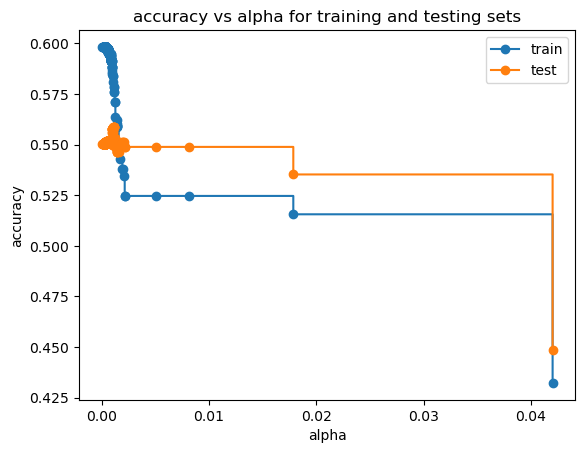

In [18]:
# Creates Decision Tree Classifier object that is trained on the training datasets
dt = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)

# Generates ccp_alpha values for this particular training dataset for this trained model
path = dt.cost_complexity_pruning_path(train_x,train_y) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# list for Decision Tree Classifiers
clfs = [] 

# Creates Decision Trees with different parameter values for ccp_alphas and then fits them to training datasets
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, max_depth=6, min_samples_leaf=3)
    clf.fit(train_x, train_y)
    clfs.append(clf)

# Generates accuracy scores
train_acc_scores = [clf.score(train_x, train_y) for clf in clfs]
test_acc_scores = [clf.score(test_x, test_y) for clf in clfs]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_acc_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_acc_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 


In [19]:
# Finding out which values of ccp_alphas produced the highest ACC

# Finding the indices in train_acc_scores with best ACC values
train_acc_scores_series = pd.Series(train_acc_scores)
print('Indices in train_acc_scores with best results: ', train_acc_scores_series.nlargest(5).index.values.tolist())

# Finding the best accuracy values  in train_acc_scores
print('Train_acc_scores with best results: ')
print(train_acc_scores_series[train_acc_scores_series.nlargest(5).index.values.tolist()])

# Finding the best ccp_alphas values for train dataset
print('Best ccp_alphas values for train dataset', ccp_alphas[train_acc_scores_series.nlargest(5).index.values.tolist()])

# Finding the accuracy values in test_acc_scores using the best ccp_alpha values for the train dataset 
test_acc_scores_series = pd.Series(test_acc_scores)
print('Test_acc_scores with best results: ')
print(test_acc_scores_series[train_acc_scores_series.nlargest(5).index.values.tolist()])


Indices in train_acc_scores with best results:  [0, 1, 2, 3, 4]
Train_acc_scores with best results: 
0    0.598308
1    0.598308
2    0.598308
3    0.598308
4    0.598308
dtype: float64
Best ccp_alphas values for train dataset [0.         0.00015473 0.00015473 0.00016505 0.00016505]
Test_acc_scores with best results: 
0    0.550124
1    0.550124
2    0.550124
3    0.550124
4    0.550124
dtype: float64


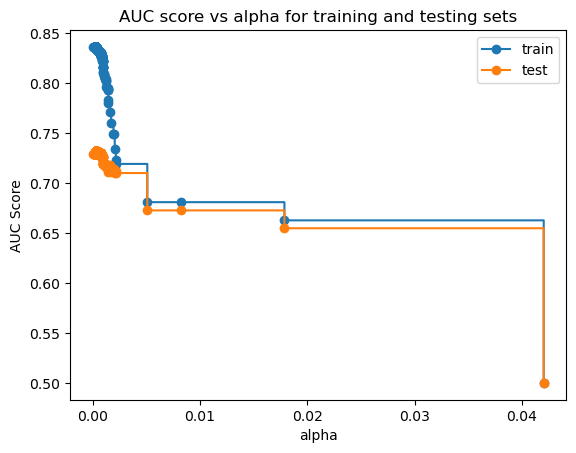

In [20]:
# Generates auc scores
train_auc_scores = [roc_auc_score(train_y, clf.predict_proba(train_x), multi_class='ovr') for clf in clfs]
test_auc_scores = [roc_auc_score(test_y, clf.predict_proba(test_x), multi_class='ovr') for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("AUC Score")
ax.set_title("AUC score vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_auc_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_auc_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 

In [21]:
# Finding out which values of ccp_alphas produced the highest AUC

# Finding the indices in train_acc_scores with best AUC values
train_auc_scores_series = pd.Series(train_auc_scores)
print('Indices in train_auc_scores with best results: ', train_auc_scores_series.nlargest(5).index.values.tolist())

# Finding the best AUC values in train_auc_scores
print('Train_auc_scores with best results: ')
print(train_auc_scores_series[train_auc_scores_series.nlargest(5).index.values.tolist()])
# Finding the best ccp_alphas values for train dataset
print('Best ccp_alphas values for train dataset', ccp_alphas[train_auc_scores_series.nlargest(5).index.values.tolist()])

# Finding the AUC values in test_auc_scores using the best ccp_alpha values for the train dataset 
test_auc_scores_series = pd.Series(test_auc_scores)
print('Test_auc_scores with best results: ')
print(test_auc_scores_series[train_auc_scores_series.nlargest(5).index.values.tolist()])


Indices in train_auc_scores with best results:  [0, 1, 2, 3, 4]
Train_auc_scores with best results: 
0    0.835963
1    0.835963
2    0.835963
3    0.835963
4    0.835963
dtype: float64
Best ccp_alphas values for train dataset [0.         0.00015473 0.00015473 0.00016505 0.00016505]
Test_auc_scores with best results: 
0    0.729012
1    0.729012
2    0.729012
3    0.729012
4    0.729012
dtype: float64


## Discussion and Conclusion for Decision Trees Model

The resulting best accuracy values from this model for the test datasets was 0.55 which is very close to the best accuracy value of 0.56 on the same dataset using k=2 KNN model. Although the best train accuracy score dropped from 1 in the k=2 KNN model to 0.598 in our best Decision Tree model. The introduction of the ccp_alpha hyperparameter improved the accuracy performance of the Decision Tree Classifier model compared to just using the max_depth and min_samples_leaf hyperparameters alone. The accuracy improved from 0.539 to 0.598 for the train dataset. The best ccp_alpha, max_depth and min_samples_leaf values for this model using this dataset are 0.0015473, 6 and 3 respectively. Adjustment of more hyperparameters might yield better accuracy results in the future.

Since the DecisionTreeClassifier had a method called predict_proba to output probabilites of prediciting a label correctly, the roc_auc_score method from sklearn could be used to produce AUC scores for the ROC curve. The best values for train and test datasets were 0.8359 and 0.729 respectively which shows that there is a high True Positive to False Positive ratio produced by the best Decision Tree Models. These best AUC scores were produced by the same best ccp_alpha value of 0.00015473 that was used to produce the best accuracy values. The hyperparameter optimaztion using GridSearchCV() didnt produce a value for AUC score so it cannot be determined whether this score has been improved with the introduction of ccp_alpha hyperparameter.

F1 scores couldn't be calculated for the Decision Trees since there is no such class method for DecisionTreeClassifier. This prevented the comparison of the best scores from happening. Ensembling methods such as Random forests, AdaBoost and Gradient Boost could improve the accuracy of the Decision Tree model by preventing overfitting. 

The failure of two different models to produce accuracy values above 0.56 for the test dataset can also be due to there not being any features in the dataset that can predict the quality/ranking labels well. This was suspected when the correlation matrix showed that none of the features had correlation values with the target variable above 0.7. It could also be be due to there not being enough samples in the dataset. This was indicated by the author of the dataset who mentioned that the labels were very imbalanced as there were not enough samples for very good or very bad wines but a lot of samples for normal/average ranked wines.
